In [52]:
import pandas as pd
import numpy as np

%matplotlib inline

In [62]:
# load in the police incident data file
policeData = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b")

policeData.head(10)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,214368107,19220799,99,2019-10-29T13:40:00,"Cecil Pl & Penn Ave Pittsburgh, PA 15222",N,Central Business District,2,FOUND PROPERTY,9489 Found Property,201.0,6.0,6.0,-80.003100,40.442497
1,214376833,19220899,99,2019-10-29T16:12:00,"200 Block Mayflower St Pittsburgh, PA 15206",N,Larimer,5,MISCELLANEOUS FIRE OTHER INVEST CONTINUED,9123 Miscellaneous Fire Other Investigation to...,1208.0,NaN,NaN,0.000000,0.000000
2,214379292,19220863,26,2019-10-28T16:00:00,"2600 Block Centre Ave Pittsburgh, PA 15219",Y,Terrace Village,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(4) Harassment Communicates Prohibited ...,510.0,6.0,3.0,-79.968380,40.446506
3,214379407,19221009,6,2019-10-29T15:00:00,"900 Block Beech Ave Pittsburgh, PA 15233",N,Allegheny West,1,THEFT FROM AUTO,3934 Theft from Vehicle,2201.0,NaN,NaN,0.000000,0.000000
4,214379413,19211917,6,2019-10-17T12:25:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Central Business District,2,RETAIL THEFT (SHOPLIFTING),3929 Retail Theft.,201.0,6.0,6.0,-79.996041,40.435040
5,214380175,19221016,99,2019-10-29T18:37:00,"3800 Block O Hara St Pittsburgh, PA 15213",Y,North Oakland,4,BENCH WARRANT ARREST - NO TIE,9501 Bench Warrant,403.0,NaN,NaN,0.000000,0.000000
6,-3280001155,19221042,99,2019-10-29T19:15:00,"100 Block Alluvian St Pittsburgh, PA 15207",N,Hazelwood,4,ACCIDENTAL FIRE,9018 Accidental Fire,1515.0,NaN,NaN,0.000000,0.000000
7,214386102,19221084,99,2019-10-29T20:30:00,"3400 Block Colby St Pittsburgh, PA 15214",N,Summer Hill,1,MISSING PERSONS (18+),9490 Missing Persons (18 and Over),2612.0,NaN,NaN,0.000000,0.000000
8,214189531,19218345,99,2019-10-26T08:48:00,"Moga St Pittsburgh, PA 15206",N,East Liberty,5,DEAD ON ARRIVAL (DOA),9496 Dead on Arrival (DOA),1113.0,9.0,2.0,-79.917510,40.467180
9,214093475,19217087,6,2019-10-24T14:30:00,"600 Block Melwood Ave Pittsburgh, PA 15213",N,North Oakland,4,THEFT FROM AUTO,3934 Theft from Vehicle,507.0,6.0,3.0,-79.954181,40.457576


In [68]:
neighborhoodCounts = pd.DataFrame(policeData['INCIDENTNEIGHBORHOOD'].value_counts())
neighborhoodCounts.rename(columns = {'INCIDENTNEIGHBORHOOD':'Aggregate Incidences'}, inplace = True)
neighborhoodCounts.head(10)

,Aggregate Incidences
Central Business District,244
South Side Flats,163
Carrick,132
Shadyside,92
East Liberty,89
Brookline,83
Mount Washington,73
Marshall-Shadeland,72
East Allegheny,65
Bluff,62


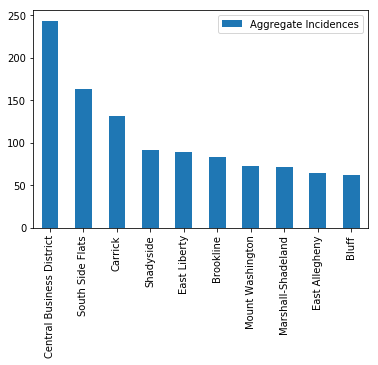

In [70]:
neighborhoodCounts.head(10).plot.bar()

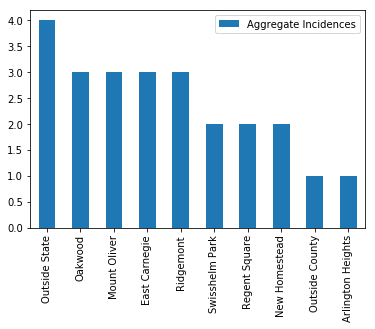

In [73]:
neighborhoodCounts.tail(10).plot.bar()